In [2]:
# =========================================================
# Linear Regression with Gradient Descent

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D




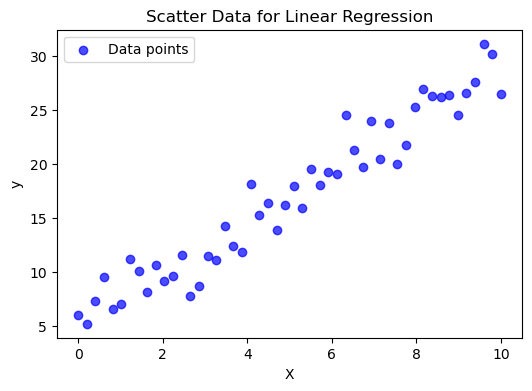

In [3]:
# --------------------------------------------
# 1.  scattered data
# --------------------------------------------
np.random.seed(42)
n_points = 50
X = np.linspace(0, 10, n_points)
true_a, true_b = 2.5, 5
y = true_a * X + true_b + np.random.randn(n_points) * 2  # add noise

plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue', alpha=0.7, label='Data points')
plt.title("Scatter Data for Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


* `The loss` function is the model’s compass, always pointing toward the direction of lower error, even when the landscape of parameters is comple

In [4]:
# 2. Define RMSE loss and its gradients
# --------------------------------------------
def predict(X, a, b):
    return a * X + b

def rmse_loss(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def gradients(X, y_true, a, b):
    y_pred = predict(X, a, b)
    da = (-2/len(X)) * np.sum(X * (y_true - y_pred))
    db = (-2/len(X)) * np.sum(y_true - y_pred)
    return da, db



In [10]:
# # 3. Gradient Descent Loop
# # --------------------------------------------
# a, b = np.random.randn(), np.random.randn()  # random init
# lr = 0.01  # learning rate
# epochs = 200

# a_hist, b_hist, loss_hist = [a], [b], []

# for i in range(epochs):
#     y_pred = predict(X, a, b)
#     loss = rmse_loss(y, y_pred)
#     da, db = gradients(X, y, a, b)
    
#     a -= lr * da
#     b -= lr * db
    
#     a_hist.append(a)
#     b_hist.append(b)
#     loss_hist.append(loss)

#     if i % 20 == 0:
#         print(f"Epoch {i:03d} | a = {a:.3f}, b = {b:.3f}, RMSE = {loss:.3f}")
# 3. Gradient Descent Loop (fixed)
a, b = np.random.randn(), np.random.randn()  # random init
lr = 0.01
epochs = 200

a_hist, b_hist, loss_hist = [a], [b], [rmse_loss(y, predict(X, a, b))]  # <— fix here

for i in range(epochs):
    y_pred = predict(X, a, b)
    loss = rmse_loss(y, y_pred)
    da, db = gradients(X, y, a, b)

    a -= lr * da
    b -= lr * db

    a_hist.append(a)
    b_hist.append(b)
    loss_hist.append(loss)


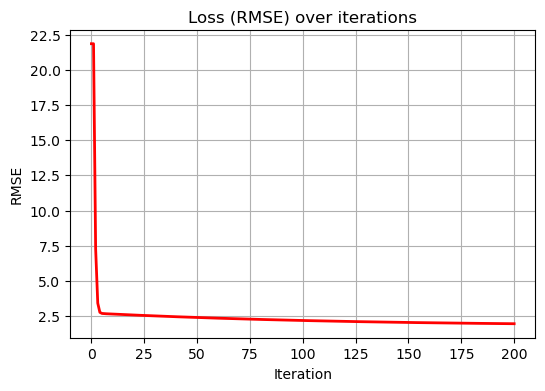

In [11]:
# 4. Plot convergence (Learning curve)
# --------------------------------------------
plt.figure(figsize=(6,4))
plt.plot(loss_hist, color='red', lw=2)
plt.title("Loss (RMSE) over iterations")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()


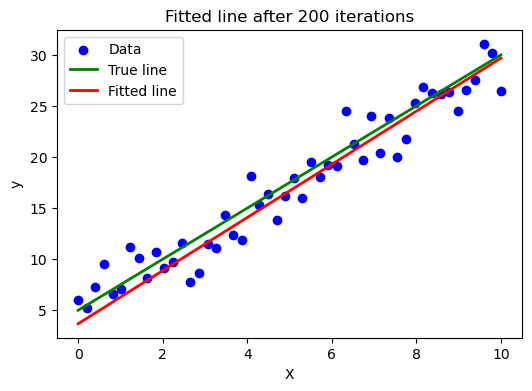

In [12]:
# 5. Compare fitted line to true data
# --------------------------------------------
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, true_a*X + true_b, color='green', label='True line', lw=2)
plt.plot(X, predict(X, a, b), color='red', label='Fitted line', lw=2)
plt.title(f"Fitted line after {epochs} iterations")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()



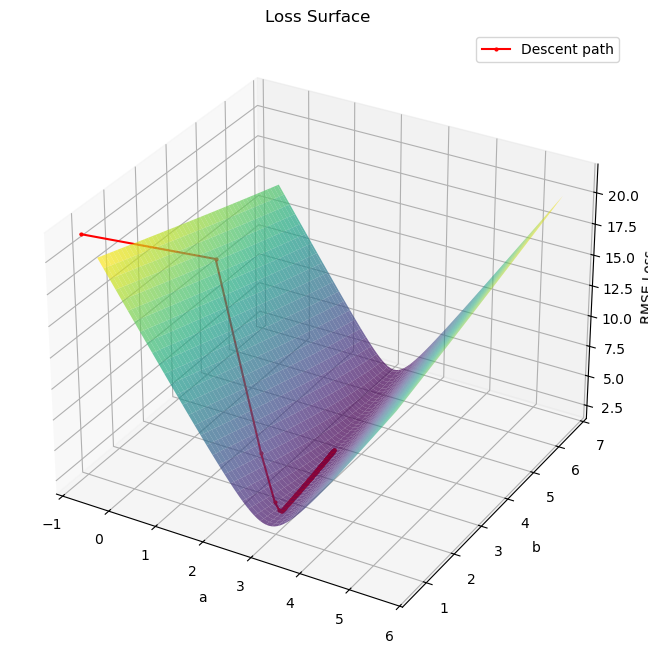

In [14]:
# 6. Visualize loss surface 
# --------------------------------------------
a_vals = np.linspace(a-3, a+3, 100)
b_vals = np.linspace(b-3, b+3, 100)
A, B = np.meshgrid(a_vals, b_vals)
Loss = np.zeros_like(A)

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        y_pred = predict(X, A[i,j], B[i,j])
        Loss[i,j] = rmse_loss(y, y_pred)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, Loss, cmap='viridis', alpha=0.7)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('RMSE Loss')
ax.set_title('Loss Surface')

# Overlay gradient descent path
ax.plot(a_hist, b_hist, loss_hist, color='r', marker='o', markersize=2, label='Descent path')
ax.legend()
plt.show()


In [15]:
# 7. Summary of results
# --------------------------------------------
print("\nFinal parameters:")
print(f"a ≈ {a:.3f}, b ≈ {b:.3f}")
print(f"True parameters: a = {true_a}, b = {true_b}")


Final parameters:
a ≈ 2.600, b ≈ 3.683
True parameters: a = 2.5, b = 5
